# Библиотеки Python для DS (семинары)

Урок 4. Практическая работа. Построение модели бинарной классификации

Используя diabetes-dataset, выполните следующие шаги:

1. Предварительная обработка данных:
— Очистите данные от пропусков (если они есть), обработайте аномалии и нормализуйте данные, если это необходимо.
— Разделите датасет на обучающую и тестовую выборки.

2. Построение модели:
— Используя алгоритм логистической регрессии, постройте модель бинарной классификации для предсказания наличия диабета у пациентов.
— Обучите модель на обучающем наборе данных.

3. Оценка модели:
— Вычислите и проанализируйте метрики точности (accuracy), точности (precision), полноты (recall) и F1-меру для обученной модели на тестовых данных.

## Выполнение домашней работы

##### Используем diabetes.csv

In [7]:
# Библиотеки для скачивания датасета
from pathlib import Path
import opendatasets as od

In [8]:
# Скачиваем датасет
dataset_path = Path('mathchi/diabetes-data-set')
# Проверяем существование директории с датасетом
if not dataset_path.is_file():
    od.download('https://www.kaggle.com/datasets/mathchi/diabetes-data-set')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:Your Kaggle Key:Dataset URL: https://www.kaggle.com/datasets/mathchi/diabetes-data-set


100%|██████████| 8.91k/8.91k [00:00<00:00, 3.04MB/s]

In [ ]:
# Библиотеки для работы с датасетом и графиками
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
# Загружаем датасет
df_diaD = pd.read_csv('diabetes-data-set/diabetes.csv')

##### 1. Предварительная обработка данных:
— Очистите данные от пропусков (если они есть), обработайте аномалии и нормализуйте данные, если это необходимо.

— Разделите датасет на обучающую и тестовую выборки.

In [3]:
# Выводим дата фрейм
df_diaD.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Этот фрейм данных содержит следующие столбцы:

1. Pregnancies: Number of times pregnant (Количество беременостей у одной женщины)
2. Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test (Концентрация глюкозы в плазме крови через 2 часа при пероральном тесте на толерантность к глюкозе)
3. BloodPressure: Diastolic blood pressure (Диастолическое кровяное давление) (mm Hg) 
4. SkinThickness: Triceps skin fold thickness (Толщина кожной складки трицепса) (mm)
5. Insulin: 2-Hour serum insulin (2-часовой прием сывороточного инсулина) (mu U/ml)
6. BMI: Body mass index (Индекс массы тела) (weight in kg/(height in m)^2)
7. DiabetesPedigreeFunction: Diabetes pedigree function (Наследственная функция диабета)
8. Age: Age (Возвраст) (years)
9. Outcome: Class variable (Class variable) (0 or 1)

In [4]:
# Выводим общую информацию
df_diaD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
# Смотрим тип данных
df_diaD.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

Из общей информации следует:
1. DataFrame содержит 1429 записей (от индекса 0 до 1428).
2. Всего 9 колонок
3. Нулевые значения отсуствуют
4. Нет пропущеных записей в колонках
5. Две колонки BMI и DiabetesPedigreeFunction в float64 значениях остальные в int64

<Axes: ylabel='Outcome'>

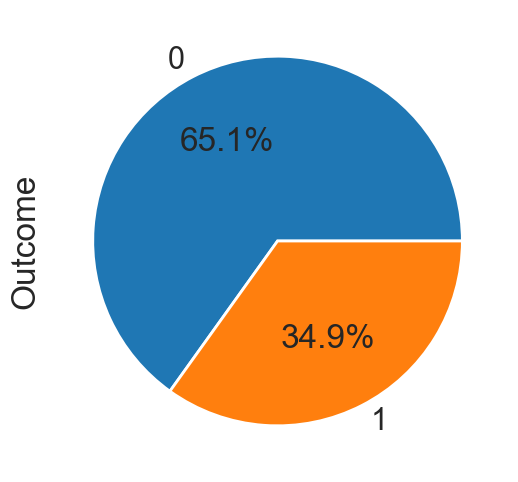

In [6]:
sns.set_style('darkgrid')
sns.set_context('poster')
plt.rcParams['figure.figsize'] = [8,6]
df_diaD.groupby('Outcome').size().plot(kind='pie',
    y = "Outcome",
    label = "Outcome",
    autopct='%1.1f%%')

Наблюдаем ситуацию небольшого дисбаланса классов, с долей 65.1% участников не больных диабетом и 34.9% с диабетом без указания типа. Данный набор имеет немного меньше представительсво одного класса по сравнению с другим.

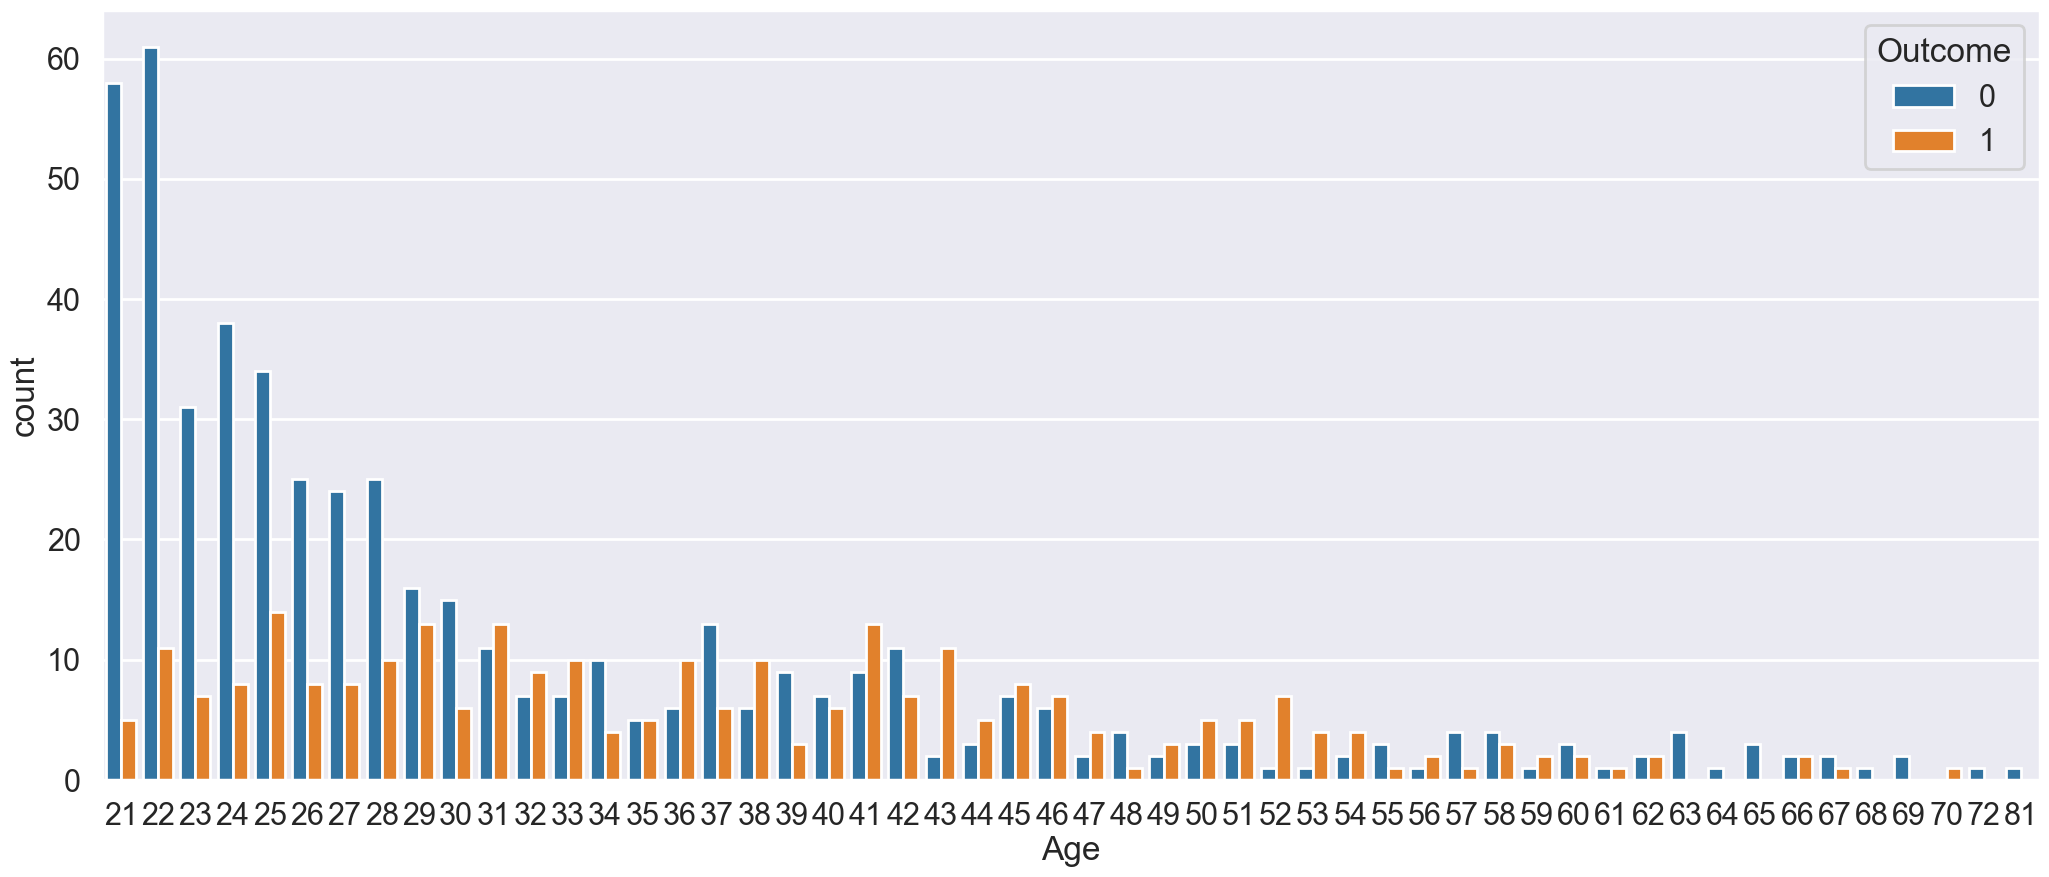

In [7]:
plt.figure(figsize=(25,10))
sns.countplot(x='Age',hue='Outcome',data=df_diaD)
plt.show()

Из графика видно что в возрасте от 21 до 28 больше всего здоровых людей. Количество больных диабетом более менее равномерно распределено от 22 до 41 года. Начиная с возраста в 47 лет не так много данных.

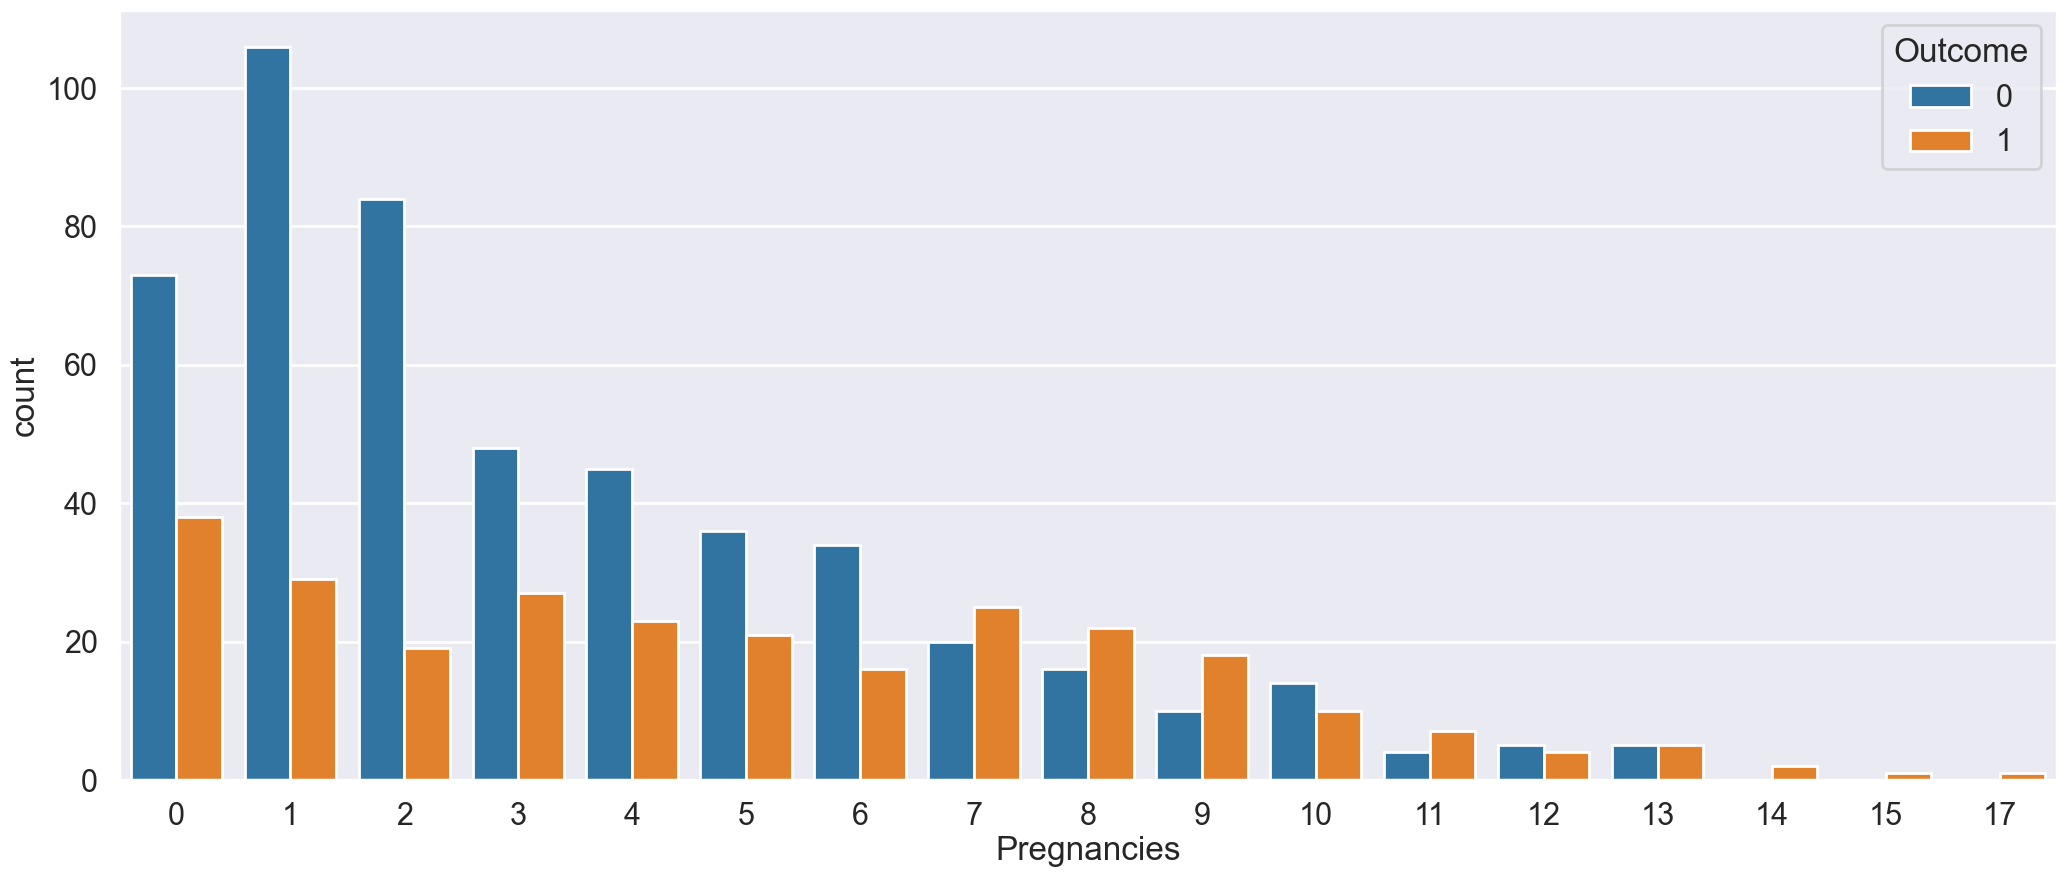

In [8]:
plt.figure(figsize=(25,10))
sns.countplot(x='Pregnancies',hue='Outcome',data=df_diaD)
plt.show()

Из графика видно что количество здоровых уменьшается с 3 беременности что свидетельствует о недостаточности данных, так как количество больных стабильно распределено относительно друг друга в рамках 20-40.

In [9]:
import altair as alt
sel = alt.selection_single(fields=["Outcome"])

c1= alt.Chart(df_diaD).mark_circle().encode(
    x="DiabetesPedigreeFunction",
    y="BMI",
    color=alt.Color('Outcome')
)
c1

C:\Users\Esdesu\AppData\Local\Temp\ipykernel_15496\3916412953.py:2: AltairDeprecationWarning: Deprecated in `altair=5.0.0`. Use selection_point instead.
  sel = alt.selection_single(fields=["Outcome"])


alt.Chart(...)

Из графика видно, что люди с высоким увронем ожирения сильнее подвержаны деабету, однако также это могут быть выбросы или просто не достаток данных, так как основное количество сдоровых и больных людей находятся в рамках 30-40.

Основывась на графиках, мы можем составить общее представление о наборе данных. Количество здоровых женщин уменшается с каждой новой беременостью. Вес сильно не влияет на заболевание диабетом, а с возрастом люди сильнее позвержены заболеванию, но по графику не достаточно данных и нет явного повышения количества заболевания диабетом.

In [10]:
# Статистический анализ числовых переменных
df_diaD.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


На основе представленных статистических данных неприрывных признаков можно сделать следующие выводы:

1. Pregnancies: Number of times pregnant (Количество беременостей у одной женщины): 
- Средний количество беременостей у одной женщины на уровне 3.00
- Миниманая 0.00
- Максимальная 17.00
- Медиана равна 3.84
- Отклонение состовляет 3.36
2. Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test (Концентрация глюкозы в плазме крови через 2 часа при пероральном тесте на толерантность к глюкозе):
- Средняя концентрация глюцозы на уровне 117.00
- Миниманая 0.00
- Максимальная 199.00
- Медиана равна 120.89
- Отклонение состовляет 31.97
3. BloodPressure: Diastolic blood pressure (Диастолическое кровяное давление) (mm Hg):
- Средние диастолическое кровяное давление на уровне 72.00
- Миниманая 0.00
- Максимальная 122.00
- Медиана равна 69.10
- Отклонение состовляет 19.35
4. SkinThickness: Triceps skin fold thickness (Толщина кожной складки трицепса) (mm):
- Средние толщина кожной складки трицепса на уровне 23.00
- Миниманая 0.00
- Максимальная 99.00
- Медиана равна 20.53
- Отклонение состовляет 15.95
5. Insulin: 2-Hour serum insulin (2-часовой прием сывороточного инсулина) (mu U/ml):
- Средние 2 часовой приём сыровоточного инсулина на уровне 30.50
- Миниманая 0.00
- Максимальная 846.00
- Медиана равна 79.79
- Отклонение состовляет 115.24
6. BMI: Body mass index (Индекс массы тела) (weight in kg/(height in m)^2):
- Средние индекс массы тела на уровне 32.00
- Миниманая 0.00
- Максимальная 67.10
- Медиана равна 31.99
- Отклонение состовляет 7.88
7. DiabetesPedigreeFunction: Diabetes pedigree function (Наследственная функция диабета):
- Средние наследственная функция диабета на уровне 0.37
- Миниманая 0.07
- Максимальная 2.42
- Медиана равна 0.47
- Отклонение состовляет 0.33
8. Age: Age (Возвраст) (years):
- Средний возвраст на уровне 29.00
- Миниманая 21.00
- Максимальная 81.00
- Медиана равна 33.24
- Отклонение состовляет 11.76

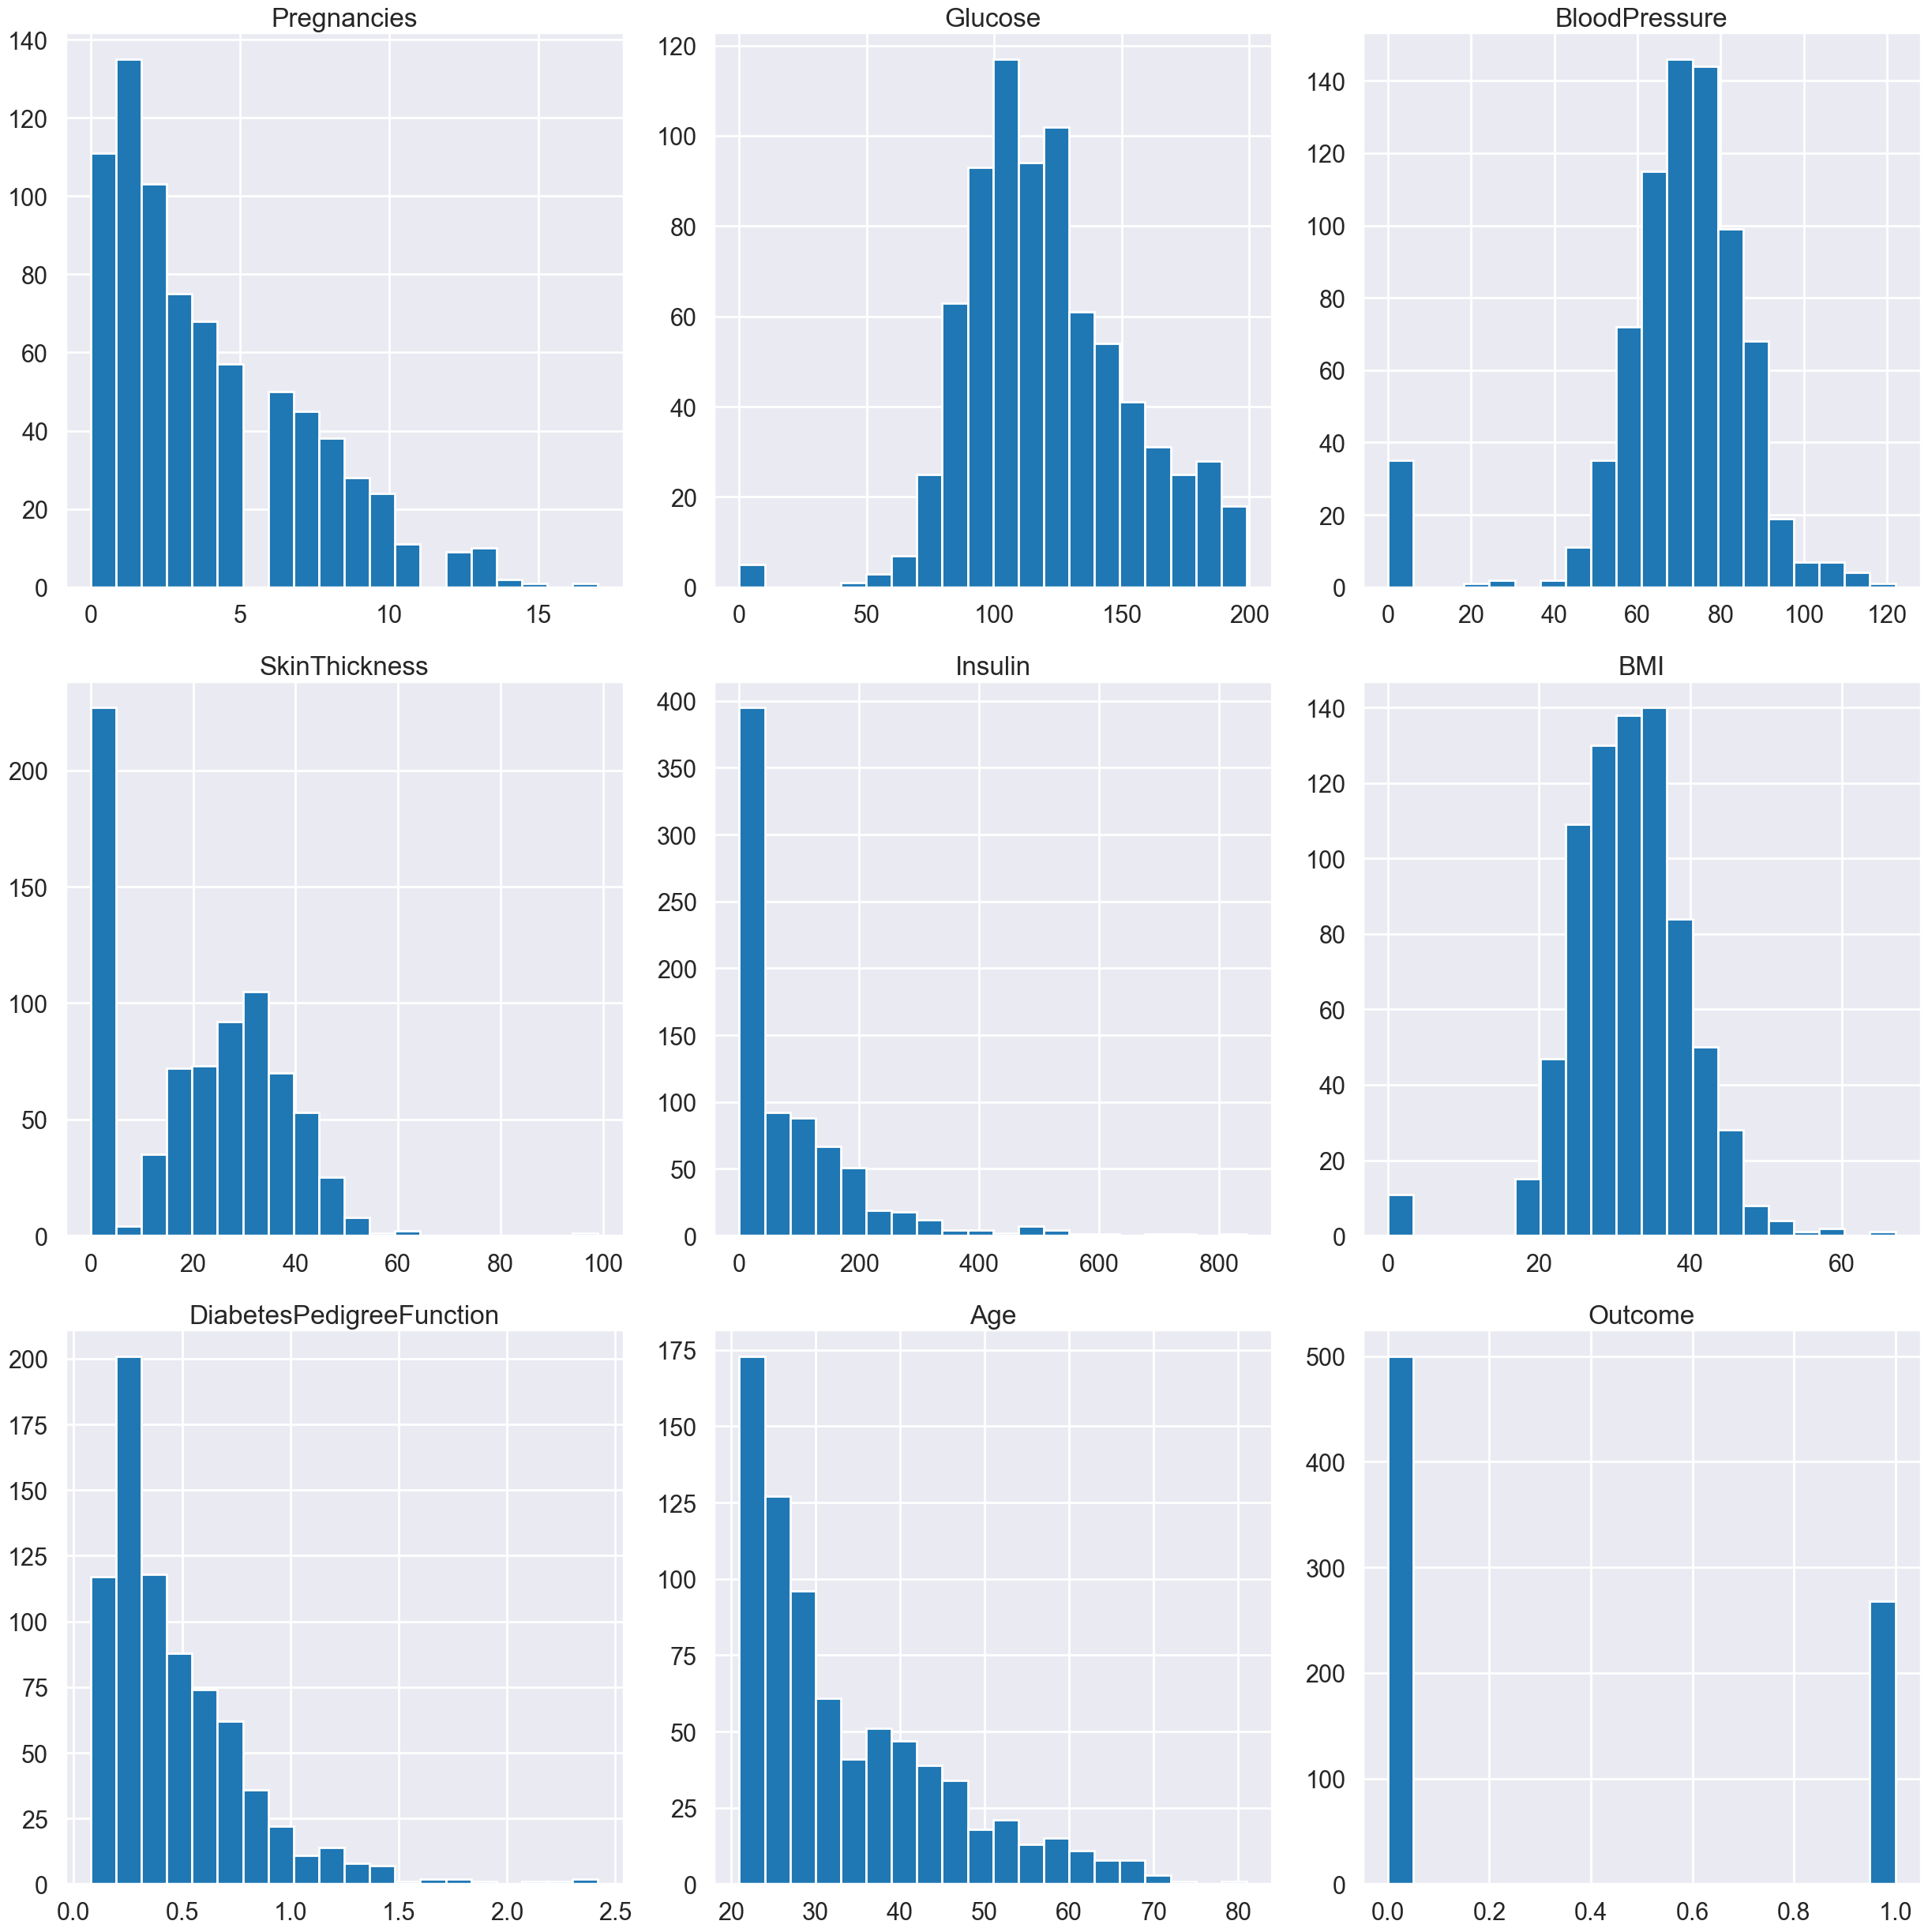

In [11]:
# Генерирует гистограммы для всех числовых столбцов в DataFrame
df_diaD.hist(figsize=(25, 25), bins=20)
plt.tight_layout() # Улучшает размещение подграфиков чтобы они не пересекались
plt.show()

1. Графки имеет крафний положительный характер и плавное снижение, это казывает, что большинство женщин беременее всего 1 до 3 раз, далее идёт снижение количество беременных.
Присуствует один начальный пик от 1 до 2 показывающий наибольшие количество беременных женщин.
2. График имеет скошеное в право распределение с концентрацией значений. Что свидетествует об одном положительным пике в диапазоне от 70 до 150, что соотвествет нормальным уровню глюкозы в крови.
3. График показывает равное с некоторыми выбросами значения артериального давления. Присуетвует один пик в пределах от 60 до 80.
4. Графк поживает начальный всплеск переходяжий в равномерный пик от 15 до 40.
5. График с резкой низко исходящей из-за низких значений инсулина у пациентов.
6. График с отображает равномерный пие от 20 до 40, что соотвествует избыточному весу у большинства.
7. Графки с ниспадающим в право распределением склонности к диабету, говорит о том, что не так много беременных склонны к диабету.
8. График с плавно ниспадающим в право распеределением возраста, который говорит о том, что большая часть беременных молодые женщины.


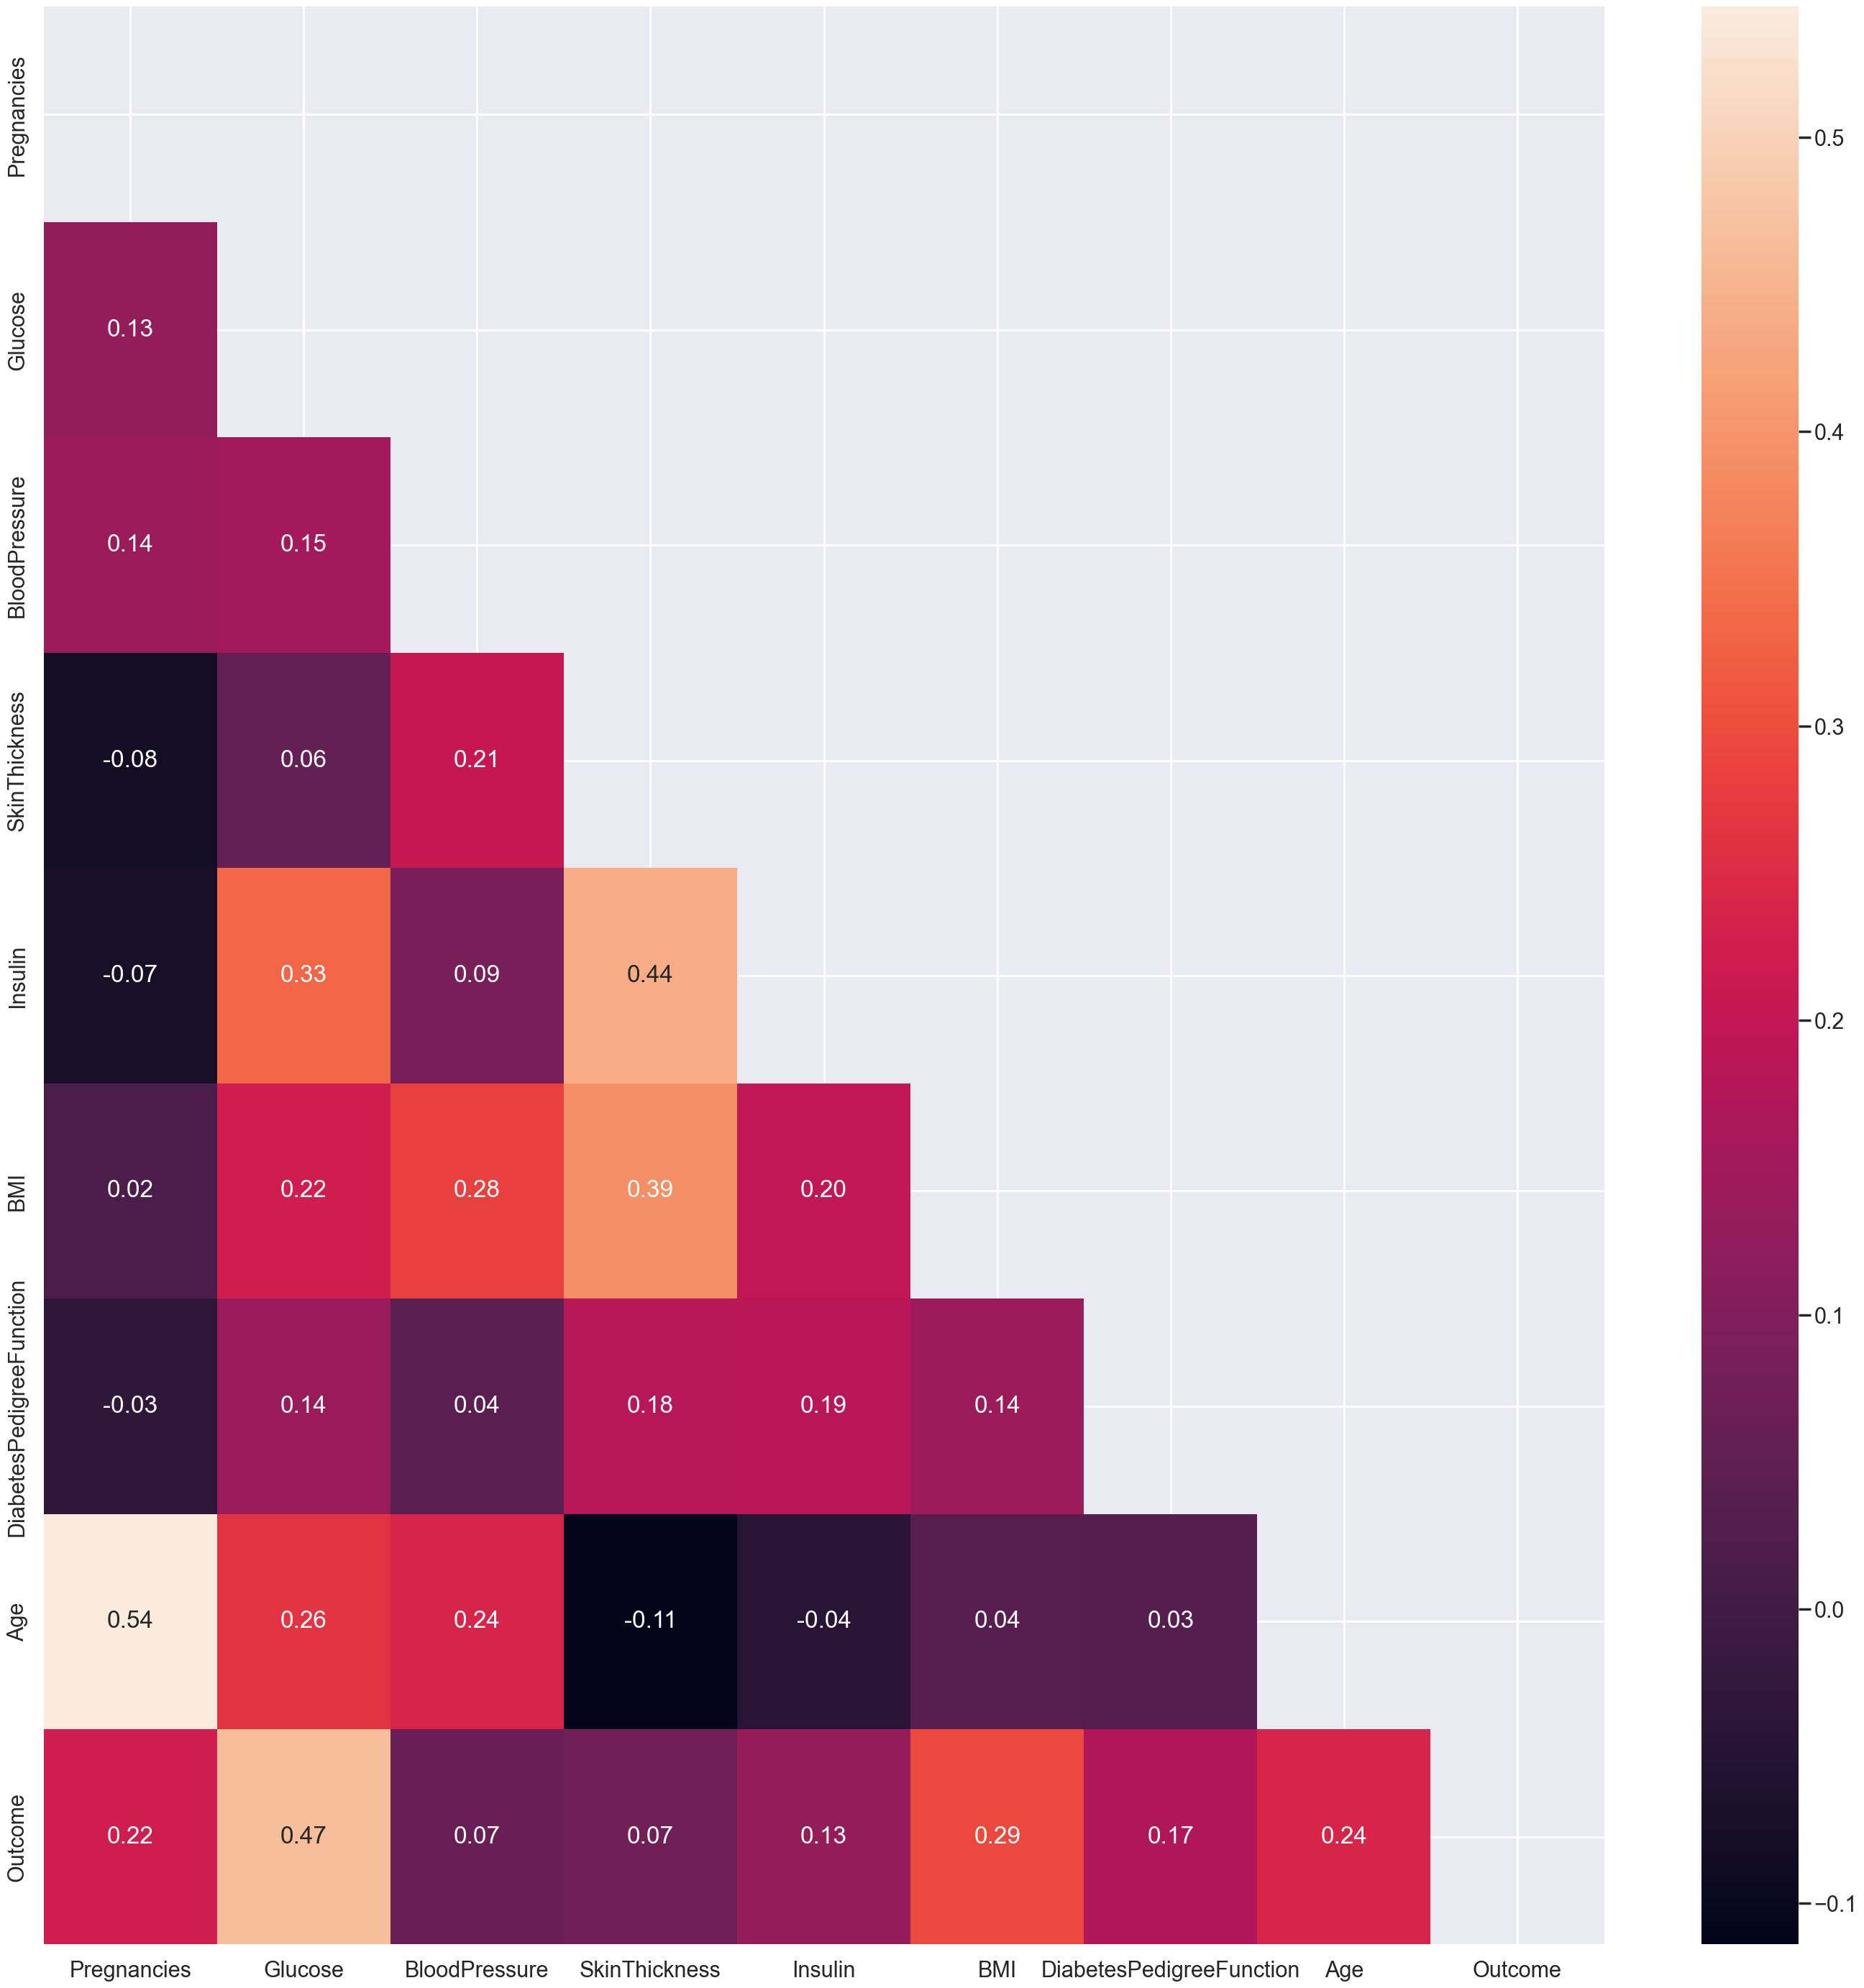

In [17]:
# Визуализация корреляции
plt.subplots(figsize=(35, 35))
mask = np.triu(np.ones_like(df_diaD.corr(), dtype=bool))
sns.heatmap(df_diaD.corr(), mask=mask, annot = True, fmt = ".2f")
plt.show()

- Сильная положительная корреляция (0.54) между 'Pregnacies' и 'Age'.
- Сильная положительная корреляция (0.47) между 'Glicose' и 'Outcome'.
- Сильная положительная корреляция (0.44) между 'SkinThickness' и 'Unsulin'.
- Сильная отрицательная корреляция (-0.11) между 'SkinThickness' и 'Age'.

##### 2. Построение модели:

— Используя алгоритм логистической регрессии, постройте модель бинарной классификации для предсказания наличия диабета у пациентов.

— Обучите модель на обучающем наборе данных.

In [27]:
# Определение признаков и целевой переменной
# Все колонки, кроме 'Outcome'
X = df_diaD.drop('Outcome', axis=1)  
# Целевая переменная
y = df_diaD['Outcome']  
# Разделение данных на обучающий и тестовый набор
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Размер обучающего набора:", X_train.shape)
print("Размер тестового набора:", X_test.shape)

Размер обучающего набора: (614, 8)
Размер тестового набора: (154, 8)


In [28]:
# Создание и обучение модели
model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)

# Предсказание на тестовой выборке
predictions = model.predict(X_test)

# Оценка производительности модели
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.7012987012987013


c:\Users\Esdesu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


##### 3. Оценка модели:

— Вычислите и проанализируйте метрики точности (accuracy), точности (precision), полноты (recall) и F1-меру для обученной модели на тестовых данных.

In [30]:
# Оценка качества модели
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

# Вывод метрик
print(f'Accuracy: {accuracy:.4f},\
      \nPrecision: {precision:.4f},\
      \nRecall: {recall:.4f},\
      \nF1 Score: {f1:.4f}')

Accuracy: 0.7013,      
Precision: 0.5634,      
Recall: 0.7273,      
F1 Score: 0.6349


Accuracy точность модели состовляет 0.70, модель правильно классифицировала примерно 70% данных.

Precision точность модели состовляет 0.56, только 56% являются положительными модель может делать достаточно много ложных данных.

Recall состовляет 0.72 это показывает что модель правильно индифицировала 72% данных.

F1 Score состовляет 0.63 даёт более менее сбалансированное представлени модели однако требует улучшений поскольку хороший вариант должен состовлять не ниже 0.70

Модель демонстрирует хороший уровень полноты, но относительно низкую точность. Это может быть приемлемо в некоторых сценариях, где важно выявить как можно больше положительных случаев, но требуется улучшение точности модели.